In [1]:
### Import section ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pycaret.regression import *

In [2]:
### Train Data Load ###
raw_df = pd.read_csv("Raw_data_ML-R8_220403_test3.csv", encoding='cp949')

In [3]:
''' Model Build and Checking  -  Section '''
##################################################################################
# Regression Model Setup (Recovery)

from pycaret.regression import *
exp_reg101 = setup(data = raw_df, numeric_features=['Temp. (°C)'], ignore_features=['Purity (%)', 'f_VC','Temp. (°C)'],
                   target = 'Recovery (%)', session_id=123, log_experiment = False, normalize= True)

,Description,Value
0,session_id,123
1,Target,Recovery (%)
2,Original Data,"(1560, 8)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1091, 4)"


In [4]:
best1 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8842,1.7411,1.3099,0.9949,0.0219,0.0142,0.3070
lightgbm,Light Gradient Boosting Machine,0.9148,1.7974,1.3285,0.9948,0.0230,0.0150,0.0460
et,Extra Trees Regressor,1.0949,2.8864,1.6916,0.9916,0.0290,0.0181,0.0910
gbr,Gradient Boosting Regressor,1.4281,4.0218,1.9902,0.9882,0.0330,0.0226,0.0110
rf,Random Forest Regressor,1.5026,4.7655,2.1676,0.9860,0.0388,0.0252,0.0930
knn,K Neighbors Regressor,2.1530,8.7472,2.9368,0.9743,0.0523,0.0361,0.0170
dt,Decision Tree Regressor,2.8212,13.6874,3.6775,0.9595,0.0624,0.0457,0.0050
br,Bayesian Ridge,4.3637,30.2416,5.4846,0.9117,0.0899,0.0694,0.0040
lar,Least Angle Regression,4.3633,30.2417,5.4846,0.9117,0.0899,0.0693,0.0060
ridge,Ridge Regression,4.3645,30.2414,5.4846,0.9117,0.0900,0.0694,0.0070


In [5]:
et=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9994,2.6824,1.6378,0.9926,0.0277,0.0165
1,0.9661,1.8898,1.3747,0.9935,0.0220,0.0149
2,1.0057,2.6309,1.6220,0.9912,0.0261,0.0155
3,1.0273,2.7057,1.6449,0.9917,0.0290,0.0176
4,1.1307,2.4434,1.5631,0.9927,0.0274,0.0181
5,1.1727,3.8387,1.9592,0.9883,0.0339,0.0201
6,1.1060,2.9075,1.7051,0.9912,0.0301,0.0181
7,1.1648,3.0101,1.7350,0.9924,0.0296,0.0193
8,1.1347,3.1695,1.7803,0.9920,0.0317,0.0197


In [6]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [7]:
predictions_et=predict_model(et, data=raw_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.2648,0.5246,0.7243,0.9985,0.0125,0.0044


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Recovery (%)', ylabel='Label'>

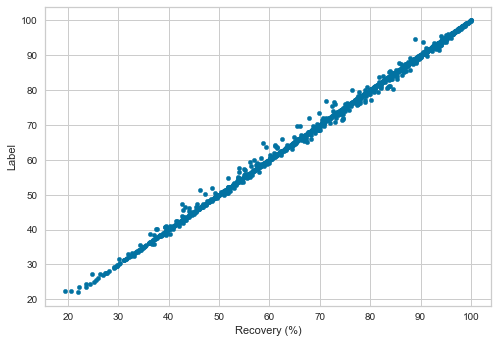

In [8]:
predictions_et.plot(x='Recovery (%)', y='Label', kind='scatter')

In [9]:
save_csv = pd.DataFrame(predictions_et).to_csv('train_data_result_Recovery_ET.csv')

In [10]:
%matplotlib tk
selected_model = et
predictions_model = predictions_et

target_Pa = 6.4
target_t = 60
target_Pd = 0.05
data_split_num=20
X_test=pd.Series(np.linspace(1,10,data_split_num))
Y_test=pd.Series(np.linspace(0.5,2.4,data_split_num))
test_df = pd.DataFrame(index=range(0,data_split_num**2),columns=raw_df.columns[:-3])
test_df['Pad (bar)']=target_Pa
test_df['Temp. (°C)']=target_t
# test_df['Feed rate (SLPM)']=41
# test_df['Rinse rate (SLPM)']=41

test_df['Pde (bar)']=target_Pd
for i in range(data_split_num):
    test_df['Feed rate (SLPM)'][data_split_num*i:data_split_num*(i+1)] = X_test[i]
    test_df['Rinse rate (SLPM)'][data_split_num*i:data_split_num*(i+1)] = Y_test

predictions_test=predict_model(selected_model, data=test_df)
fig = plt.figure()
ax = fig.gca(projection='3d')
X=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Feed rate (SLPM)']
Y=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Rinse rate (SLPM)']
Z=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Recovery (%)']
Zdot=predictions_model[(predictions_model['Pad (bar)']==target_Pa) & (predictions_model['Temp. (°C)']==target_t) & (predictions_model['Pde (bar)']==target_Pd)]['Label']
X_t=test_df[test_df['Pad (bar)']==target_Pa]['Feed rate (SLPM)']
Y_t=test_df[test_df['Pad (bar)']==target_Pa]['Rinse rate (SLPM)']
Zdot_test=predictions_test[predictions_test['Pad (bar)']==target_Pa]['Label']
ax.scatter(X,Y,Z, c='blue', alpha=0.5)
ax.scatter(X,Y,Zdot, c='red', alpha=0.5, marker='x')
ax.scatter(X_t,Y_t,Zdot_test, c='darkgreen', alpha=0.5, marker='x')
ax.set_xlabel('Feed rate (SLPM)')
ax.set_ylabel('Rinse rate (SLPM)')
ax.set_zlabel('Recovery (%)')
plt.show()

In [11]:
save_csv = pd.DataFrame({'train_Feed rate (SLPM)' : X, 
                        'train_Rinse rate (SLPM)' : Y,
                        'train_Purity (%)' : Z,
                        'train_predict_Recovery (%)' : Zdot,
                        'test_Feed rate (SLPM)' : X_t,
                        'test_Rinse rate (SLPM)' : Y_t,
                        'test_predict_Recovery (%)' : Zdot_test
                        }).to_csv('Feed_Rinse_Recovery_Pa{0}_t{1}_Pd{2}_test3_et.csv'.format(target_Pa,target_t,target_Pd))

In [12]:
import shap
training_data = get_config(variable="X_train") # Extract Train data in Pycaret setup
explainer = shap.Explainer(model = et)
shap_values = explainer(training_data)
# display([shap_values[:,0],shap_values[:,2:]])

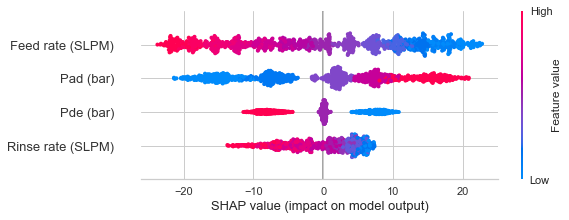

In [14]:
%matplotlib inline
def beeswarm_plot(shap_values):
    return shap.plots.beeswarm(shap_values, show=False)
plt.clf()
beeswarm_plot(shap_values)
plt.savefig("et1_beeswarm.png",dpi=600, bbox_inches='tight')

In [15]:
''' Model Build and Checking  -  Section '''
##################################################################################
# Regression Model Setup (Purity (%))
from pycaret.regression import *
exp_reg102 = setup(data = raw_df, numeric_features=['Temp. (°C)'], ignore_features=['Recovery (%)','f_VC','Temp. (°C)'],
                   target = 'Purity (%)', session_id=123, log_experiment = False, normalize=True)

,Description,Value
0,session_id,123
1,Target,Purity (%)
2,Original Data,"(1560, 8)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1091, 4)"


In [16]:
best2 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.2442,0.1607,0.3951,0.9972,0.0045,0.0028,0.3420
lightgbm,Light Gradient Boosting Machine,0.3887,0.4088,0.6309,0.9929,0.0076,0.0045,0.0560
gbr,Gradient Boosting Regressor,0.6273,0.6961,0.8278,0.9881,0.0094,0.0070,0.0110
et,Extra Trees Regressor,0.4713,0.7229,0.8298,0.9877,0.0100,0.0055,0.0820
rf,Random Forest Regressor,0.5236,0.7515,0.8572,0.9872,0.0102,0.0060,0.0890
knn,K Neighbors Regressor,0.8453,1.9032,1.3629,0.9682,0.0169,0.0099,0.0160
dt,Decision Tree Regressor,0.9192,1.8777,1.3602,0.9681,0.0159,0.0106,0.0050
ridge,Ridge Regression,2.2125,8.2051,2.8582,0.8594,0.0334,0.0250,0.0040
br,Bayesian Ridge,2.2129,8.2051,2.8583,0.8593,0.0334,0.0250,0.0040
lar,Least Angle Regression,2.2133,8.2051,2.8583,0.8593,0.0334,0.0250,0.0040


In [17]:
et2=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5441,1.0390,1.0193,0.9858,0.0127,0.0064
1,0.4582,0.4758,0.6898,0.9928,0.0080,0.0053
2,0.5075,0.7165,0.8465,0.9896,0.0102,0.0060
3,0.3646,0.3897,0.6243,0.9931,0.0077,0.0043
4,0.6498,1.3577,1.1652,0.9767,0.0136,0.0074
5,0.4470,0.6380,0.7988,0.9864,0.0097,0.0051
6,0.4228,0.4250,0.6519,0.9917,0.0074,0.0048
7,0.4275,0.4328,0.6578,0.9935,0.0079,0.0049
8,0.5256,1.1789,1.0858,0.9799,0.0129,0.0061


In [18]:
evaluate_model(et2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
predictions_et2=predict_model(et2, data=raw_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.1205,0.2967,0.5447,0.9948,0.0061,0.0014


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Purity (%)', ylabel='Label'>

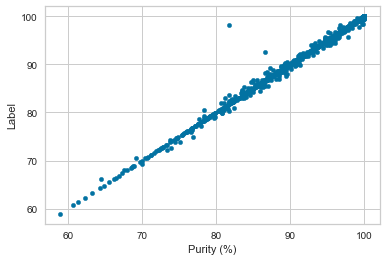

In [20]:
predictions_et2.plot(x='Purity (%)', y='Label', kind='scatter')

In [21]:
save_csv = pd.DataFrame(predictions_et2).to_csv('train_data_result_Purity_ET.csv')

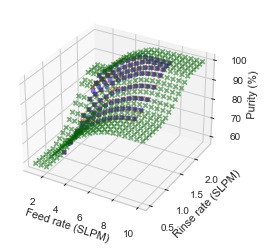

In [22]:
%matplotlib tk
selected_model = et2
predictions_model = predictions_et2

target_Pa = 6.4
target_t = 60
target_Pd = 0.05
data_split_num=20
X_test=pd.Series(np.linspace(1,10,data_split_num))
Y_test=pd.Series(np.linspace(0.5,2.4,data_split_num))
test_df = pd.DataFrame(index=range(0,data_split_num**2),columns=raw_df.columns[:-3])
test_df['Pad (bar)']=target_Pa
test_df['Temp. (°C)']=target_t
# test_df['Feed rate (SLPM)']=41
# test_df['Rinse rate (SLPM)']=41

test_df['Pde (bar)']=target_Pd
for i in range(data_split_num):
    test_df['Feed rate (SLPM)'][data_split_num*i:data_split_num*(i+1)] = X_test[i]
    test_df['Rinse rate (SLPM)'][data_split_num*i:data_split_num*(i+1)] = Y_test

predictions_test3=predict_model(selected_model, data=test_df)
fig = plt.figure()
ax = fig.gca(projection='3d')
X=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Feed rate (SLPM)']
Y=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Rinse rate (SLPM)']
Z=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Purity (%)']
Zdot=predictions_model[(predictions_model['Pad (bar)']==target_Pa) & (predictions_model['Temp. (°C)']==target_t) & (predictions_model['Pde (bar)']==target_Pd)]['Label']
X_t=test_df[test_df['Pad (bar)']==target_Pa]['Feed rate (SLPM)']
Y_t=test_df[test_df['Pad (bar)']==target_Pa]['Rinse rate (SLPM)']
Zdot_test=predictions_test3[predictions_test3['Pad (bar)']==target_Pa]['Label']
ax.scatter(X,Y,Z, c='blue', alpha=0.5)
ax.scatter(X,Y,Zdot, c='red', alpha=0.5, marker='x')
ax.scatter(X_t,Y_t,Zdot_test, c='darkgreen', alpha=0.5, marker='x')
ax.set_xlabel('Feed rate (SLPM)')
ax.set_ylabel('Rinse rate (SLPM)')
ax.set_zlabel('Purity (%)')
plt.show()

In [23]:
save_csv = pd.DataFrame({'train_Feed rate (SLPM)' : X, 
                        'train_Rinse rate (SLPM)' : Y,
                        'train_Purity (%)' : Z,
                        'train_predict_Recovery (%)' : Zdot,
                        'test_Feed rate (SLPM)' : X_t,
                        'test_Rinse rate (SLPM)' : Y_t,
                        'test_predict_Purity (%)' : Zdot_test
                        }).to_csv('Feed_Rinse_Purity_Pa{0}_t{1}_Pd{2}_test3_ET.csv'.format(target_Pa,target_t,target_Pd))

In [24]:
import shap
training_data = get_config(variable="X_train") # Extract Train data in Pycaret setup
explainer = shap.Explainer(model = et2)
shap_values = explainer(training_data)

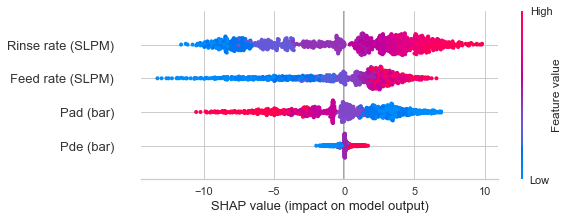

In [25]:
%matplotlib inline
def beeswarm_plot(shap_values):
    return shap.plots.beeswarm(shap_values, show=False)
plt.clf()
beeswarm_plot(shap_values)
plt.savefig("et2_beeswarm.png",dpi=600, bbox_inches='tight')

In [26]:
''' Model Build and Checking  -  Section '''
##################################################################################
# Regression Model Setup (f_VC)
from pycaret.regression import *
exp_reg103 = setup(data = raw_df, numeric_features=['Temp. (°C)'], ignore_features=['Recovery (%)','Purity (%)','Temp. (°C)'],
                   target = 'f_VC', session_id=123, log_experiment = False, normalize= True)

,Description,Value
0,session_id,123
1,Target,f_VC
2,Original Data,"(1560, 8)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1091, 4)"


In [27]:
best3 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0120,0.0003,0.0162,0.9983,0.0060,0.0071,0.2400
lightgbm,Light Gradient Boosting Machine,0.0163,0.0005,0.0226,0.9966,0.0087,0.0101,0.0590
et,Extra Trees Regressor,0.0187,0.0008,0.0278,0.9949,0.0110,0.0120,0.0860
rf,Random Forest Regressor,0.0240,0.0011,0.0337,0.9925,0.0129,0.0150,0.0870
gbr,Gradient Boosting Regressor,0.0279,0.0013,0.0358,0.9915,0.0133,0.0166,0.0110
dt,Decision Tree Regressor,0.0367,0.0024,0.0494,0.9839,0.0186,0.0226,0.0050
knn,K Neighbors Regressor,0.0359,0.0028,0.0527,0.9816,0.0208,0.0231,0.0150
ada,AdaBoost Regressor,0.0832,0.0104,0.1017,0.9322,0.0384,0.0513,0.0130
lar,Least Angle Regression,0.1166,0.0204,0.1428,0.8653,0.0521,0.0695,0.0050
br,Bayesian Ridge,0.1166,0.0204,0.1428,0.8653,0.0521,0.0695,0.0050


In [28]:
et3=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0180,0.0007,0.0271,0.9951,0.0114,0.0119
1,0.0199,0.0009,0.0295,0.9942,0.0115,0.0128
2,0.0222,0.0009,0.0305,0.9933,0.0119,0.0141
3,0.0202,0.0009,0.0292,0.9944,0.0120,0.0133
4,0.0163,0.0005,0.0234,0.9968,0.0090,0.0102
5,0.0182,0.0007,0.0264,0.9949,0.0100,0.0112
6,0.0167,0.0006,0.0254,0.9963,0.0100,0.0105
7,0.0174,0.0006,0.0251,0.9959,0.0092,0.0104
8,0.0211,0.0012,0.0343,0.9933,0.0150,0.0151


In [29]:
evaluate_model(et3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
predictions3_et3=predict_model(et3, data=raw_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0049,0.0002,0.0140,0.9987,0.0055,0.0031


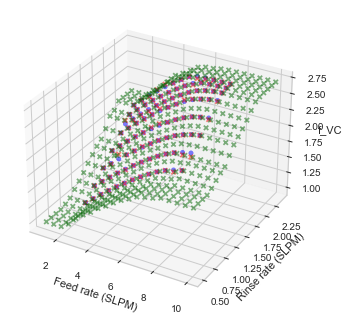

In [ ]:
%matplotlib tk
selected_model = et3
predictions_model = predictions3_et3

target_Pa = 6.4
target_t = 60
target_Pd = 0.05
data_split_num=20
X_test=pd.Series(np.linspace(1,10,data_split_num))
Y_test=pd.Series(np.linspace(0.5,2.4,data_split_num))
test_df = pd.DataFrame(index=range(0,data_split_num**2),columns=raw_df.columns[:-3])
test_df['Pad (bar)']=target_Pa
test_df['Temp. (°C)']=target_t
# test_df['Feed rate (SLPM)']=41
# test_df['Rinse rate (SLPM)']=41

test_df['Pde (bar)']=target_Pd
for i in range(data_split_num):
    test_df['Feed rate (SLPM)'][data_split_num*i:data_split_num*(i+1)] = X_test[i]
    test_df['Rinse rate (SLPM)'][data_split_num*i:data_split_num*(i+1)] = Y_test

predictions_test3=predict_model(selected_model, data=test_df)
fig = plt.figure()
ax = fig.gca(projection='3d')
X=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Feed rate (SLPM)']
Y=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Rinse rate (SLPM)']
Z=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['f_VC']
Zdot=predictions_model[(predictions_model['Pad (bar)']==target_Pa) & (predictions_model['Temp. (°C)']==target_t) & (predictions_model['Pde (bar)']==target_Pd)]['Label']
X_t=test_df[test_df['Pad (bar)']==target_Pa]['Feed rate (SLPM)']
Y_t=test_df[test_df['Pad (bar)']==target_Pa]['Rinse rate (SLPM)']
Zdot_test=predictions_test3[predictions_test3['Pad (bar)']==target_Pa]['Label']
ax.scatter(X,Y,Z, c='blue', alpha=0.5)
ax.scatter(X,Y,Zdot, c='red', alpha=0.5, marker='x')
ax.scatter(X_t,Y_t,Zdot_test, c='darkgreen', alpha=0.5, marker='x')
ax.set_xlabel('Feed rate (SLPM)')
ax.set_ylabel('Rinse rate (SLPM)')
ax.set_zlabel('f_VC')
plt.show()

In [31]:
save_csv = pd.DataFrame({'train_Feed rate (SLPM)' : X, 
                        'train_Rinse rate (SLPM)' : Y,
                        'train_Purity (%)' : Z,
                        'train_predict_Recovery (%)' : Zdot,
                        'test_Feed rate (SLPM)' : X_t,
                        'test_Rinse rate (SLPM)' : Y_t,
                        'test_predict_Recovery (%)' : Zdot_test
                        }).to_csv('Feed_Rinse_f_VC_Pa{0}_t{1}_Pd{2}_test3_ET.csv'.format(target_Pa,target_t,target_Pd))
##################################################################################

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='f_VC', ylabel='Label'>

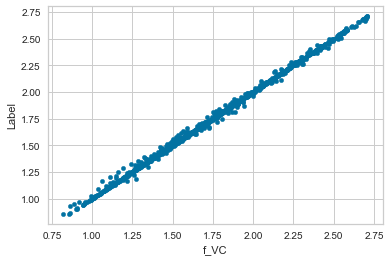

In [32]:
predictions3_et3.plot(x='f_VC', y='Label', kind='scatter')

In [33]:
save_csv = pd.DataFrame(predictions3_et3).to_csv('train_data_result_f_VC_ET.csv')

In [34]:
import shap
training_data = get_config(variable="X_train") # Extract Train data in Pycaret setup
explainer = shap.Explainer(model = et3)
shap_values = explainer(training_data)

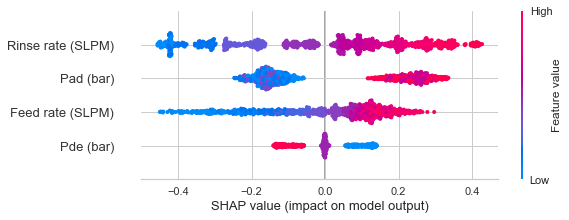

In [35]:
%matplotlib inline
def beeswarm_plot(shap_values):
    return shap.plots.beeswarm(shap_values, show=False)
plt.clf()
beeswarm_plot(shap_values)
plt.savefig("et3_beeswarm.png",dpi=600, bbox_inches='tight')

In [36]:
save_model(et, 'et_saved_220525_test3')
save_model(et2, 'et2_saved_220525_test3')
save_model(et3, 'et3_saved_220525_test3')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Recovery (%)',
                                                        'Purity (%)',
                                                        'Temp. (°C)'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='f_VC',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_val...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features

In [37]:
##################################################################################
''' Optimization  -  Section '''
##################################################################################
Model_R = load_model('et_saved_220525_test3')
Model_P = load_model('et2_saved_220525_test3')
Model_V = load_model('et3_saved_220525_test3')

def manwoo_model_callback(trial):
    a = trial.suggest_float('Pad (bar)', 2.5, 6.4)
    b = 60
    c = trial.suggest_float('Feed rate (SLPM)', 2, 8)
    d = trial.suggest_float('Rinse rate (SLPM)', 0.8, 2.1)
    e = trial.suggest_float('Pde (bar)', 0.05, 0.15)

    test_df = pd.DataFrame({'Pad (bar)' : [a],
                            'Temp. (°C)' : [b],
                            'Feed rate (SLPM)' : [c],
                            'Rinse rate (SLPM)' : [d],
                            'Pde (bar)' : [e]
                            })

    prediction_R = predict_model(Model_R, data=test_df)
    prediction_P = predict_model(Model_P, data=test_df)
    prediction_V = predict_model(Model_V, data=test_df)

    Feed_CO = 0.2*test_df['Feed rate (SLPM)']*60/(10**3*0.082057*273.15)
    Product_CO = Feed_CO*prediction_R['Label']/100
    Productivity = Product_CO*10**3*24/(4*578.36/10**3)

    k_comp = 1.4*(0.517+0.253)+1.28*0.23
    k_vc = 1.4
    mu = 0.75
    Feed_Compressor = 2.78*10**(-4)*k_comp/(k_comp-1)*100*test_df['Pad (bar)']/mu/mu/test_df['Pad (bar)']**((k_comp-1)/k_comp-1)
    Rinse_Compressor = 2.78*10**(-4)*k_vc/(k_vc-1)*100*test_df['Pad (bar)']/mu/mu/test_df['Pad (bar)']**((k_vc-1)/k_vc-1)
    Vacuum_Pump = 2.78*10**(-4)*k_vc/(k_vc-1)*100*mu/mu/(1/test_df['Pde (bar)'])**((k_vc-1)/k_vc-1)
    Electricity = Feed_Compressor + Rinse_Compressor*(test_df['Rinse rate (SLPM)']/test_df['Feed rate (SLPM)']) + Vacuum_Pump*(prediction_V['Label']/test_df['Feed rate (SLPM)'])

    CO_Low = (prediction_P['Label']/100)*(2411/11000)*0.528
    CO_High = 15.49008*np.exp(0.75093*(prediction_P['Label']-98))
    CO_Price = max([CO_Low[0], CO_High[0]])

    Fee_gas = (20/100)*(2411/11000)*0.528
    Elec_price = 0.1
    Propit = CO_Price*Product_CO*22.4
    Cost = test_df['Feed rate (SLPM)']*(60/10**3)*Fee_gas
    Opex = (60/10**3)*test_df['Feed rate (SLPM)']*Electricity*Elec_price

    obj = Propit-Cost-Opex
    
    return(obj[0])



Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [38]:
import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

# Try changing the number of trials (n_trials=100)
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(manwoo_model_callback, n_trials=100)


[I 2022-07-30 13:50:21,357] A new study created in memory with name: no-name-27bdd17c-c65f-48be-b5c0-52544525ad28
[I 2022-07-30 13:50:22,143] Trial 0 finished with value: -0.1399016231331372 and parameters: {'Pad (bar)': 6.034820246086804, 'Feed rate (SLPM)': 4.614722412420644, 'Rinse rate (SLPM)': 0.8796732675137533, 'Pde (bar)': 0.07397626888795446}. Best is trial 0 with value: -0.1399016231331372.
[I 2022-07-30 13:50:22,948] Trial 1 finished with value: 0.3074541023891858 and parameters: {'Pad (bar)': 3.171137374175963, 'Feed rate (SLPM)': 3.651186168558242, 'Rinse rate (SLPM)': 1.6635287389816003, 'Pde (bar)': 0.07781825989007432}. Best is trial 1 with value: 0.3074541023891858.
[I 2022-07-30 13:50:23,746] Trial 2 finished with value: -0.08883493930291196 and parameters: {'Pad (bar)': 4.560818284598631, 'Feed rate (SLPM)': 4.480250332297659, 'Rinse rate (SLPM)': 1.0013474090323062, 'Pde (bar)': 0.07012040309080471}. Best is trial 1 with value: 0.3074541023891858.
[I 2022-07-30 13:5

In [39]:
print('best value is :\n', study.best_value)
print('best condition is :\n',study.best_trial)

best value is :
 3.776092510765608
best condition is :
 FrozenTrial(number=96, values=[3.776092510765608], datetime_start=datetime.datetime(2022, 7, 30, 13, 51, 40, 604404), datetime_complete=datetime.datetime(2022, 7, 30, 13, 51, 41, 485826), params={'Pad (bar)': 6.39708565459795, 'Feed rate (SLPM)': 7.850194445104599, 'Rinse rate (SLPM)': 2.097888434234387, 'Pde (bar)': 0.06344137798482667}, distributions={'Pad (bar)': UniformDistribution(high=6.4, low=2.5), 'Feed rate (SLPM)': UniformDistribution(high=8.0, low=2.0), 'Rinse rate (SLPM)': UniformDistribution(high=2.1, low=0.8), 'Pde (bar)': UniformDistribution(high=0.15, low=0.05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=96, state=TrialState.COMPLETE, value=None)


In [40]:

plot_optimization_history(study)

In [41]:
plot_parallel_coordinate(study)

In [42]:
plot_contour(study)

In [43]:
plot_slice(study)

In [44]:
plot_param_importances(study)

In [45]:
##################################################################################

In [46]:
from pycaret.regression import *
##################################################################################
''' Test  -  Section '''
##################################################################################

Model_R = load_model('et_saved_220525_test3')
Model_P = load_model('et2_saved_220525_test3')
Model_V = load_model('et3_saved_220525_test3')

test_df = pd.read_csv("Test_data_ML-R9_220516_test3_MW.csv", encoding='cp949')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [47]:
test_prediction_R=predict_model(Model_R, data=test_df)
test_prediction_P=predict_model(Model_P, data=test_df)
test_prediction_V=predict_model(Model_V, data=test_df)
save_csv = test_prediction_R.to_csv('220525_test_R_test3_et.csv')
save_csv = test_prediction_P.to_csv('220525_test_P_test3_et.csv')
save_csv = test_prediction_V.to_csv('220525_test_V_test3_et.csv')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,71.9180,5473.4962,73.9831,-38602.0365,3.2985,43.6156


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,90.2394,8191.6387,90.5077,-57772.3344,3.5364,54.2948


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0064,0.0002,0.0126,0.9989,0.0050,0.0041


In [48]:
from sklearn.metrics import r2_score
print('r2 score et')
print(r2_score(test_df['Recovery (%)'], test_prediction_R['Label']))
print(r2_score(test_df['Purity (%)'], test_prediction_P['Label']))
print(r2_score(test_df['f_VC'], test_prediction_V['Label']))

from sklearn.metrics import mean_squared_error
print('mse score et')
print(mean_squared_error(test_df['Recovery (%)'], test_prediction_R['Label']))
print(mean_squared_error(test_df['Purity (%)'], test_prediction_P['Label']))
print(mean_squared_error(test_df['f_VC'], test_prediction_V['Label']))

print('rmse score et')
print(mean_squared_error(test_df['Recovery (%)'], test_prediction_R['Label'], squared=False))
print(mean_squared_error(test_df['Purity (%)'], test_prediction_P['Label'], squared=False))
print(mean_squared_error(test_df['f_VC'], test_prediction_V['Label'], squared=False))

from sklearn.metrics import mean_absolute_error
print('mae score et')
print(mean_absolute_error(test_df['Recovery (%)'], test_prediction_R['Label']))
print(mean_absolute_error(test_df['Purity (%)'], test_prediction_P['Label']))
print(mean_absolute_error(test_df['f_VC'], test_prediction_V['Label']))


r2 score et
0.9991125095736588
0.9986583700732797
0.9988863647946968
mse score et
0.2713255642635625
0.06796716837241337
0.0001579015186769377
rmse score et
0.5208892053628703
0.26070513683549346
0.012565887102665601
mae score et
0.31902125016712013
0.13427184959048302
0.0064440047442921615


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Recovery (%)', ylabel='Label'>

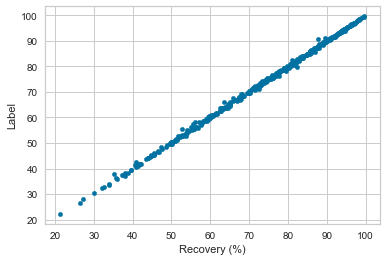

In [49]:
test_prediction_R.plot(x='Recovery (%)', y='Label', kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Purity (%)', ylabel='Label'>

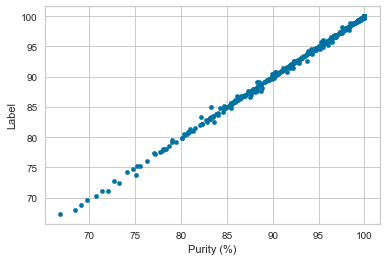

In [50]:
test_prediction_P.plot(x='Purity (%)', y='Label', kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='f_VC', ylabel='Label'>

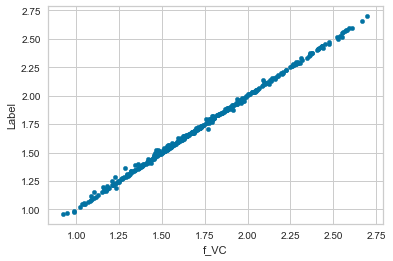

In [51]:
test_prediction_V.plot(x='f_VC', y='Label', kind='scatter')

In [52]:
Model_R = load_model('et_saved_220525_test3')
Model_P = load_model('et2_saved_220525_test3')
Model_V = load_model('et3_saved_220525_test3')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [53]:
Model_R = load_model('et_saved_220525_test3')
Model_P = load_model('et2_saved_220525_test3')
Model_V = load_model('et3_saved_220525_test3')

columns_name = ['Pad (bar)', 'Feed rate (SLPM)', 'Rinse rate (SLPM)', 'Pde (bar)']
point_1 = [4.099, 5.3, 1.87, 0.055]
point_2 = [4.112, 4.81, 1.92, 0.05]
point_3 = [3.999, 6.22, 1.94, 0.05]
point_4 = [4.772, 5.06, 2.00, 0.05]
point_5 = [3.895, 5.84, 1.90, 0.05]
Check_df = pd.DataFrame([point_1, point_2, point_3, point_4, point_5], columns=columns_name)

predictions_R=predict_model(Model_R, data=Check_df)
predictions_P=predict_model(Model_P, data=Check_df)
predictions_V=predict_model(Model_V, data=Check_df)

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [54]:
predict_model(Model_R, data=Check_df)

,Pad (bar),Feed rate (SLPM),Rinse rate (SLPM),Pde (bar),Label
0,4.099,5.30,1.87,0.055,77.267489
1,4.112,4.81,1.92,0.050,81.769175
2,3.999,6.22,1.94,0.050,63.749786
3,4.772,5.06,2.00,0.050,79.470573
4,3.895,5.84,1.90,0.050,69.607568


In [55]:
predict_model(Model_P, data=Check_df)

,Pad (bar),Feed rate (SLPM),Rinse rate (SLPM),Pde (bar),Label
0,4.099,5.30,1.87,0.055,99.431761
1,4.112,4.81,1.92,0.050,99.451519
2,3.999,6.22,1.94,0.050,99.992820
3,4.772,5.06,2.00,0.050,99.439209
4,3.895,5.84,1.90,0.050,99.990554


In [56]:
predict_model(Model_V, data=Check_df)

,Pad (bar),Feed rate (SLPM),Rinse rate (SLPM),Pde (bar),Label
0,4.099,5.30,1.87,0.055,2.080777
1,4.112,4.81,1.92,0.050,2.082201
2,3.999,6.22,1.94,0.050,2.047561
3,4.772,5.06,2.00,0.050,2.419939
4,3.895,5.84,1.90,0.050,2.040522


In [57]:
import optuna
### Multi-objective Optimization with Optuna
### target 1 = productivity 
### target 2 = purity

##################################################################################
''' Optimization  -  Section '''
##################################################################################
Model_R = load_model('et_saved_220525_test3')
Model_P = load_model('et2_saved_220525_test3') 
# Model_V = load_model('et3_saved_220525_test3')

def manwoo_model_callback2(trial):
    a = trial.suggest_float('Pad (bar)', 2.5, 6.4)
    b = 60
    c = trial.suggest_float('Feed rate (SLPM)', 2, 8)
    d = trial.suggest_float('Rinse rate (SLPM)', 0.8, 2.1)
    e = trial.suggest_float('Pde (bar)', 0.05, 0.15)

    test_df = pd.DataFrame({'Pad (bar)' : [a],
                            'Temp. (°C)' : [b],
                            'Feed rate (SLPM)' : [c],
                            'Rinse rate (SLPM)' : [d],
                            'Pde (bar)' : [e]
                            })

    prediction_R = predict_model(Model_R, data=test_df)
    prediction_P = predict_model(Model_P, data=test_df) # Purity Model Result
    Purity = prediction_P['Label'][0]

    Feed_CO = 0.2*test_df['Feed rate (SLPM)']*60/(10**3*0.082057*273.15)
    Product_CO = Feed_CO*prediction_R['Label']/100
    Productivity = Product_CO*10**3*24/(4*578.36/10**3) # Productivity Model Result

    return Purity, Productivity



Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [58]:
study2 = optuna.create_study(directions=["maximize", "maximize"])
study2.optimize(manwoo_model_callback2, n_trials=50)
print("Number of finished trials: ", len(study2.trials))

[I 2022-07-30 13:51:52,938] A new study created in memory with name: no-name-b682320d-a1f1-4cfd-9d3f-094541d74fba
[I 2022-07-30 13:51:53,518] Trial 0 finished with values: [90.76907821655273, 18.37100174321789] and parameters: {'Pad (bar)': 6.121703063317018, 'Feed rate (SLPM)': 3.518615280245087, 'Rinse rate (SLPM)': 1.9521621604678165, 'Pde (bar)': 0.06487210409458749}. 
[I 2022-07-30 13:51:54,089] Trial 1 finished with values: [98.49790687561035, 18.461194502258405] and parameters: {'Pad (bar)': 4.4817732031736774, 'Feed rate (SLPM)': 4.127883455230607, 'Rinse rate (SLPM)': 1.9100281493512754, 'Pde (bar)': 0.10317209448351114}. 
[I 2022-07-30 13:51:54,706] Trial 2 finished with values: [89.08539237976075, 18.318717818349434] and parameters: {'Pad (bar)': 2.723346195425574, 'Feed rate (SLPM)': 7.075594681669058, 'Rinse rate (SLPM)': 0.9094893645745351, 'Pde (bar)': 0.11570685675361024}. 
[I 2022-07-30 13:51:55,268] Trial 3 finished with values: [87.8182755279541, 24.99108519305606] a

Number of finished trials:  50


In [59]:
trials_df = study2.trials_dataframe(attrs=("number", "value", "params", "state"))
save_csv = trials_df.to_csv('220706_study2_trials.csv')

In [60]:
# study2.best_trials.number
columns_name=['number', 'Pad (bar)','Feed rate (SLPM)', 'Rinse rate (SLPM)', 'Pde (bar)', 'value_0', 'value_1']
best_trials_df = pd.DataFrame(columns=columns_name)
for i in range(len(study2.best_trials)):
    best_trial = [study2.best_trials[i].number,
                  study2.best_trials[i].params['Pad (bar)'],
                  study2.best_trials[i].params['Feed rate (SLPM)'],
                  study2.best_trials[i].params['Rinse rate (SLPM)'],
                  study2.best_trials[i].params['Pde (bar)'],
                  study2.best_trials[i].values[0],
                  study2.best_trials[i].values[1]
                 ]
    best_trials_df = best_trials_df.append(pd.DataFrame([best_trial], columns=columns_name), ignore_index=True)
save_csv = best_trials_df.to_csv('220706_study2_best_trials.csv')


In [61]:
optuna.visualization.plot_pareto_front(study2, target_names=["Purity", "Productivity"])

In [62]:
optuna.visualization.plot_param_importances(
    study2, target=lambda t: t.values[0], target_name="Purity"
)

In [63]:
optuna.visualization.plot_param_importances(
    study2, target=lambda t: t.values[1], target_name="Productivity"
)